## Plotting 
Please place the relevant CSVs into the right folder. You can use the `plot_compleness` and `get_stats` functions to get the data we need for the report. 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

directories = ['ALWAYS-TRUST', 'NEVER-TRUST', 'RANDOM-TRUST', 'GROUP62']
persons = ['Alice', 'Ben', 'Charlie']

In [16]:
def plot_completeness(dfs: dict, title: str, save: bool = False):
    '''
    Plots 'completeness' column against 'tick_nr' on each of the provided dataframes
    '''
    fig, ax = plt.subplots()
    for key, df in dfs.items():
        ax.plot(df['tick_nr'], df['completeness'], label=key)

    ax.set_xlabel('Tick Number')
    ax.set_ylabel('Completeness')

    # set completeness scale from 0 to 1
    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.legend()
    if save:
        plt.savefig(title + '.png')
    plt.show()

Place all the relevant persons into a dictionary to plot them together. Please make sure to use the same ordering so the colors correspond to the same person in subsequent plots. I left some placeholders for you to fill in.

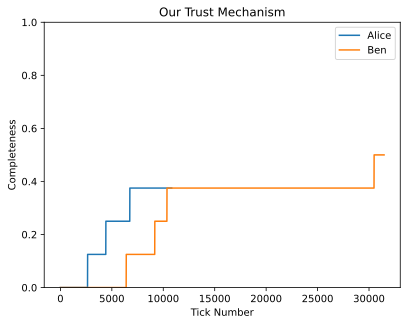

In [27]:
dfs = {'Alice': pd.read_csv('GROUP62/jack_0.csv', delimiter=';'), \
       'Ben': pd.read_csv('GROUP62/john_0.csv', delimiter=';') }
title = 'Our Trust Mechanism'

plot_completeness(dfs, title, save=True)

In [28]:
def get_stats(dfs: dict, human_name: str):
    '''
    Prints the time to finish the task, number of human actions, number of agent actions, and completness
    '''
    for key, df in dfs.items():
        ticks_required = df['tick_nr'].max()
        human_actions = df[f'{human_name}_action'].count()
        agent_actions = df['rescuebot_action'].count()

        # Find first row where completeness is 1
        max_completion = df['completeness'].max()
        completeness = df.loc[df['completeness'] == max_completion].iloc[0]['tick_nr']
        
        print(f'{key} stats:')
        print(f'\tTotal ticks: {ticks_required}')
        print(f'\tHuman actions: {human_actions}')
        print(f'\tAgent actions: {agent_actions}')
        print(f'\tMax completeness ({max_completion}) at tick: {completeness}')


Because the human's name is included in the CSV log, you need to provide it to the function.

In [30]:
get_stats(dfs, 'aral')

Alice stats:
	Total ticks: 10818
	Human actions: 56
	Agent actions: 4608
	Max completeness (0.375) at tick: 6743
Ben stats:
	Total ticks: 31464
	Human actions: 416
	Agent actions: 4455
	Max completeness (0.5) at tick: 30487
